In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
imshowg = lambda x: plt.imshow(x,cmap=plt.get_cmap('gray'))
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [9]:
def interp_rgb(a,b,n,modein=cv2.COLOR_BGR2HSV,modeout=cv2.COLOR_HSV2BGR):
    a = np.uint8([[a]])
    b = np.uint8([[b]])
    if modein is None:
        a1,b1 = a,b
    else:
        a1 = cv2.cvtColor(a,modein)
        b1 = cv2.cvtColor(b,modein)
    # 1 1 3
    ll = np.linspace(0,1,n)
    #y = a1*ll+b1*(ll-1)
    r = np.zeros((n,1,3),dtype=np.uint8)
    for i,l in enumerate(ll):
        r[i,:,:] = a1*l+b1*(1-l)
    return cv2.cvtColor(r,modeout) if modeout is not None else r


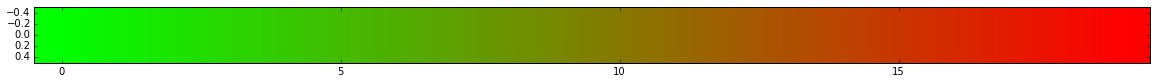

In [10]:
x = interp_rgb((255,0,0),(0,255,0),20,None,None)
y = cv2.merge([c.T for c in cv2.split(x)])
plt.imshow(y)